# PySpark

## 설치하기
PySpark를 이용하기 위해선 다음과 같은 패키지가 설치되어 있어야 합니다.
* java (>= 8.0)
* Spark (>= 2.2.0)
* Python (>= 3.4.0)


**<스파크 설치>**  
아래 코드를 통해 버전을 확인해 보세요. 2.2.X 이상이면 됩니다.

In [1]:
import pyspark
pyspark.__version__

'3.0.1'

## 실습

In [2]:
from pyspark import SparkConf, SparkContext

# 선언
sc = SparkContext()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [3]:
type(sc)

pyspark.context.SparkContext

In [4]:
# 실수로 SparkContext를 한 개 더 만들면 에러가 납니다.
new_sc = SparkContext()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-2-e0e0e99efdc7>:4 

In [7]:
# SparkContext를 종료
sc.stop()

In [8]:
# 어플리케이션의 이름과 Master의 URL을 설정
conf = SparkConf().setAppName('PySpark Basic').setMaster('local')
sc = SparkContext(conf=conf)
sc

<SparkContext master=local appName=PySpark Basic>

## RDD Creation

### 1) 내부에서 만들어진 데이터 집합을 병렬화하는 방법: parallelize()함수

In [9]:
rdd = sc.parallelize([1,2,3])
rdd

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:262

In [10]:
rdd.take(3)

[1, 2, 3]

### 2) 외부의 파일을 로드하는 방법: .textFile() 함수 사용


In [11]:
import os

file_path = os.getenv('HOME')+'/aiffel/bigdata_ecosystem/test.txt'
with open(file_path, 'w') as f:
    for i in range(10):
        f.write(str(i)+'\n')
        
print('OK')

OK


In [12]:
# 방금 만든 파일을 불러와 RDD를 생성
rdd2 = sc.textFile(file_path)
print(rdd2)
print(type(rdd2))

/aiffel/aiffel/bigdata_ecosystem/test.txt MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0
<class 'pyspark.rdd.RDD'>


In [13]:
# Actions를 수행
rdd2.take(3)

['0', '1', '2']

## Transformations
* map()
* filter()
* flatmap()

### map

In [14]:
x = sc.parallelize(["b", "a", "c", "d"])
y = x.map(lambda z: (z, 1))
print(x.collect()) #collect()는 actions입니다. 
print(y.collect())

['b', 'a', 'c', 'd']
[('b', 1), ('a', 1), ('c', 1), ('d', 1)]


In [15]:
nums = sc.parallelize([1, 2, 3])
squares = nums.map(lambda x: x*x)
print(squares.collect())

[1, 4, 9]


### filter

In [16]:
x = sc.parallelize([1,2,3,4,5])
y = x.filter(lambda x: x%2 == 0) 
print(x.collect())
print(y.collect())

[1, 2, 3, 4, 5]
[2, 4]


In [17]:
text = sc.parallelize(['a', 'b', 'c', 'd'])
capital = text.map(lambda x: x.upper())
A = capital.filter(lambda x: 'A' in x)
print(text.collect())
print(A.collect())

['a', 'b', 'c', 'd']
['A']


### flatmap

In [18]:
x = sc.parallelize([1,2,3])
y = x.flatMap(lambda x: (x, x*10, 30))
print(x.collect())
print(y.collect())

[1, 2, 3]
[1, 10, 30, 2, 20, 30, 3, 30, 30]


In [19]:
wordsDataset = sc.parallelize(["Spark is funny", "It is beautiful", "And also It is implemented by python"])
result = wordsDataset.flatMap(lambda x: x.split()).filter(lambda x: x != " ").map(lambda x: x.lower())
# 공백은 제거합니다.
# 단어를 공백기준으로 split 합니다. 
result.collect()

['spark',
 'is',
 'funny',
 'it',
 'is',
 'beautiful',
 'and',
 'also',
 'it',
 'is',
 'implemented',
 'by',
 'python']

### 심화 : CSV 파일 읽어들이기


In [20]:
import os
csv_path = os.getenv('HOME')+'/aiffel/bigdata_ecosystem/train.csv'
csv_data_0 = sc.textFile(csv_path)
csv_data_0.take(5)

['survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone',
 '0,male,22.0,1,0,7.25,Third,unknown,Southampton,n',
 '1,female,38.0,1,0,71.2833,First,C,Cherbourg,n',
 '1,female,26.0,0,0,7.925,Third,unknown,Southampton,y',
 '1,female,35.0,1,0,53.1,First,C,Southampton,n']

In [21]:
# 비어있는 라인은 제외하고, delimeter인 ,로 line을 분리해 줍니다. 
csv_data_1 = csv_data_0.filter(lambda line: len(line)>1).map(lambda line: line.split(","))   
csv_data_1.take(5)

[['survived',
  'sex',
  'age',
  'n_siblings_spouses',
  'parch',
  'fare',
  'class',
  'deck',
  'embark_town',
  'alone'],
 ['0',
  'male',
  '22.0',
  '1',
  '0',
  '7.25',
  'Third',
  'unknown',
  'Southampton',
  'n'],
 ['1', 'female', '38.0', '1', '0', '71.2833', 'First', 'C', 'Cherbourg', 'n'],
 ['1',
  'female',
  '26.0',
  '0',
  '0',
  '7.925',
  'Third',
  'unknown',
  'Southampton',
  'y'],
 ['1', 'female', '35.0', '1', '0', '53.1', 'First', 'C', 'Southampton', 'n']]

In [22]:
columns = csv_data_1.take(1)
columns

[['survived',
  'sex',
  'age',
  'n_siblings_spouses',
  'parch',
  'fare',
  'class',
  'deck',
  'embark_town',
  'alone']]

In [23]:
csv_data_2 = csv_data_1.filter(lambda line: line[0].isdecimal())  # 첫 번째 컬럼이 숫자인 것만 필터링
csv_data_2.take(5)

[['0',
  'male',
  '22.0',
  '1',
  '0',
  '7.25',
  'Third',
  'unknown',
  'Southampton',
  'n'],
 ['1', 'female', '38.0', '1', '0', '71.2833', 'First', 'C', 'Cherbourg', 'n'],
 ['1',
  'female',
  '26.0',
  '0',
  '0',
  '7.925',
  'Third',
  'unknown',
  'Southampton',
  'y'],
 ['1', 'female', '35.0', '1', '0', '53.1', 'First', 'C', 'Southampton', 'n'],
 ['0',
  'male',
  '28.0',
  '0',
  '0',
  '8.4583',
  'Third',
  'unknown',
  'Queenstown',
  'y']]

In [24]:
csv_data_3 = csv_data_2.map(lambda line: [(columns[0][i], linedata) for i, linedata in enumerate(line)])
csv_data_3.take(5)

[[('survived', '0'),
  ('sex', 'male'),
  ('age', '22.0'),
  ('n_siblings_spouses', '1'),
  ('parch', '0'),
  ('fare', '7.25'),
  ('class', 'Third'),
  ('deck', 'unknown'),
  ('embark_town', 'Southampton'),
  ('alone', 'n')],
 [('survived', '1'),
  ('sex', 'female'),
  ('age', '38.0'),
  ('n_siblings_spouses', '1'),
  ('parch', '0'),
  ('fare', '71.2833'),
  ('class', 'First'),
  ('deck', 'C'),
  ('embark_town', 'Cherbourg'),
  ('alone', 'n')],
 [('survived', '1'),
  ('sex', 'female'),
  ('age', '26.0'),
  ('n_siblings_spouses', '0'),
  ('parch', '0'),
  ('fare', '7.925'),
  ('class', 'Third'),
  ('deck', 'unknown'),
  ('embark_town', 'Southampton'),
  ('alone', 'y')],
 [('survived', '1'),
  ('sex', 'female'),
  ('age', '35.0'),
  ('n_siblings_spouses', '1'),
  ('parch', '0'),
  ('fare', '53.1'),
  ('class', 'First'),
  ('deck', 'C'),
  ('embark_town', 'Southampton'),
  ('alone', 'n')],
 [('survived', '0'),
  ('sex', 'male'),
  ('age', '28.0'),
  ('n_siblings_spouses', '0'),
  ('parch'

In [25]:
from pyspark import SparkConf, SparkContext, SQLContext
from pyspark import SparkFiles

url = 'https://storage.googleapis.com/tf-datasets/titanic/train.csv'
sc.addFile(url)
sqlContext = SQLContext(sc)

df = sqlContext.read.csv(SparkFiles.get("train.csv"), header=True, inferSchema= True)
df.show(5, truncate = False)

+--------+------+----+------------------+-----+-------+-----+-------+-----------+-----+
|survived|sex   |age |n_siblings_spouses|parch|fare   |class|deck   |embark_town|alone|
+--------+------+----+------------------+-----+-------+-----+-------+-----------+-----+
|0       |male  |22.0|1                 |0    |7.25   |Third|unknown|Southampton|n    |
|1       |female|38.0|1                 |0    |71.2833|First|C      |Cherbourg  |n    |
|1       |female|26.0|0                 |0    |7.925  |Third|unknown|Southampton|y    |
|1       |female|35.0|1                 |0    |53.1   |First|C      |Southampton|n    |
|0       |male  |28.0|0                 |0    |8.4583 |Third|unknown|Queenstown |y    |
+--------+------+----+------------------+-----+-------+-----+-------+-----------+-----+
only showing top 5 rows



In [26]:
# 위에서 얻은 데이터에서 40세 이상인 사람들의 데이터만 필터링해 봅시다. 
df2 = df[df['age']>40]
df2.show(5, truncate = False)

+--------+------+----+------------------+-----+-------+------+-------+-----------+-----+
|survived|sex   |age |n_siblings_spouses|parch|fare   |class |deck   |embark_town|alone|
+--------+------+----+------------------+-----+-------+------+-------+-----------+-----+
|0       |male  |66.0|0                 |0    |10.5   |Second|unknown|Southampton|y    |
|0       |male  |42.0|1                 |0    |52.0   |First |unknown|Southampton|n    |
|1       |female|49.0|1                 |0    |76.7292|First |D      |Cherbourg  |n    |
|0       |male  |65.0|0                 |1    |61.9792|First |B      |Cherbourg  |n    |
|0       |male  |45.0|1                 |0    |83.475 |First |C      |Southampton|n    |
+--------+------+----+------------------+-----+-------+------+-------+-----------+-----+
only showing top 5 rows



## RDD Operation Actions
* collect()
* take()
* count()
* reduce()
* saveAsTextFile()

### collect
RDD 내의 모든 값을 리턴합니다. 주의하세요! 정말 **빅**데이터를 다루고 있다면 함부로 호출하지 않는 게 좋습니다.

In [27]:
nums = sc.parallelize(list(range(10)))
nums.collect()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### take

In [28]:
nums.take(3)

[0, 1, 2]

### count

In [29]:
nums.count()

10

### reduce
드디어 reduce() 함수가 나왔습니다. MapReduce의 그 reduce에 해당합니다.  
MapReduce를 스파크에서 어떻게 구현했는지 알 수 있습니다. Map은 Transformation 함수로, Reduce는 Action 함수로 구현했습니다. Reduce할 데이터가 RDD로 메모리상에 존재하므로 이전의 다른 구현체보다 훨씬 빠르게 MapReduce를 실행할 수 있겠습니다.

In [30]:
nums.reduce(lambda x, y: x + y)


45

### saveAsTextFile

In [34]:
file_path = os.getenv('HOME')+'/aiffel/bigdata_ecosystem/file_1.txt'
nums.saveAsTextFile(file_path)

!ls -l ~/aiffel/bigdata_ecosystem

total 12
drwxr-xr-x 2 root root 4096 Sep  6 07:32 file_1.txt
drwxr-xr-x 3 root root 4096 Sep  6 07:28 file.txt
-rw-r--r-- 1 root root   20 Sep  6 07:29 test.txt
lrwxrwxrwx 1 root root   22 Sep  6 07:28 train.csv -> /aiffel/data/train.csv


file.txt 내용을 잘 보시면, 놀랍게도 디렉토리 타입으로 생성되어 있습니다. 이 디렉토리 안에 들어가 보면 part-00000 라는 이름의 텍스트 파일이 생성되어 있어서, 실제 우리가 기록하고 싶었던 내용은 이 파일 안에 있습니다.
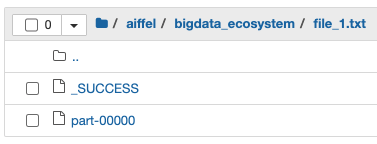

왜 이런 일이 생겼을까요?

우리가 다루고 있는 스파크가 바로 분산형 빅데이터 시스템이라는 것을 잊어서는 안 됩니다. 스파크가 다룰 파일 사이즈는 하드디스크 하나에 다 담지 못할 만큼 큰 경우일 수도 있습니다. 비록 작은 RDD지만 우리는 이미 sc.parallelize()를 통해 분산형 데이터로 생성했음을 잊지 맙시다.

In [32]:
# 요약
# RDD 생성
rdd = sc.parallelize(range(1,100))

# RDD Transformation 
rdd2 = rdd.map(lambda x: 0.5*x - 10).filter(lambda x: x > 0)

# RDD Action 
rdd2.reduce(lambda x, y: x + y)

1580.0